<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/desarrollo/RedesNeuronales/01_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Redes Neuronales Arficiales</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Ángel Pérez León.

# Introducción

El cerebro humano tiene mas de 8080 billones de células, que se conocen como **neuronas**, estas se comunican unas con otras mediante pequeños impulsos eléctricos.

No todas las neuronas se comunican entre si, se organizan en estructuras que se enfocan en tareas especificas. Estas estructuras son conocidas como **redes neuronales** biológicas.

## El cerebro humano

El cerebro humano es mucho muy complejo, al grado de que hoy en día no se conoce por completo su funcionamiento.

Sin embargo una de las características mas importantes del mismo y que forman parte esencial de lo que veremos más adelante, es que, el cerebro humano **aprende de la experiencia**.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/raton.png?raw=1" width="700">
</center>


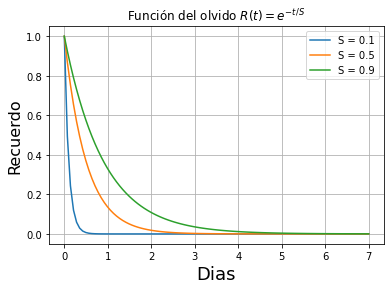

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0, 7, 100)    # Codominio de la función, de 0 a 7 con 100 puntos
# t=tiemo, S=intensidad del recuerdo
R = lambda t, S: np.exp(-t/S) # Definición de la función del olvido

# Definimos algunos parámetros para la gráfica
plt.title('Función del olvido $R(t) = e^{-t/S}$')

# Realizamos tres gráficas para S=0.1, S=0.5 y S=0.9] de la curva del olvido
for S in [0.1, 0.5, 0.9]:
    plt.plot(t, R(t, S),label="S = "+str(S))

# Mostramos la leyenda de las gráficas
plt.xlabel('Dias', fontsize=18)
plt.ylabel('Recuerdo', fontsize=16)
plt.grid()
plt.legend()
plt.show()

## Neurona

Igual que sucede con el cerebro humano, **la neurona artificial es la unidad de toda red neuronal artificial** (R.N.A.) y se comportan de manera muy similar a sus análogas biológicas.

Una neurona artificial responde a las señales que recibe, y envía información a otras neuronas dentro de la red.

En este jupyter vamos a analizar el funcionamiento particular de una neurona, sin embargo el verdadero poder de las neuronas radica en organizarse y formar redes neuronales.

## Sinapsis

Dentro de una red neuronal biológica la sinapsis es la forma en la cual se establecen **vías de comunicación** ente las neuronas dentro de una red neuronal.

En una red neuronal artificial, es necesario simular estas vías de comunicación y este proceso se lleva a cabo mediante expresiones matemáticas que finalmente se traducen en **algoritmos computacionales**.


## Red Neuronal

Cada vez que aprendes un nuevo juego, un nuevo baile o alguna nueva habilidad matemática, algunas neuronas fortalecen sus conexiones entre si y debilitan algunas otras conexiones.

Es decir que la estructura de **la red neuronal evoluciona** a medida en que se aprenden nuevas habilidades.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/barton.jpg?raw=1" width="450">
</center>

## Red Neuronal Artificial

Como ya te puedes imaginar, una red neuronal artificial consiste en un conjunto de neuronas artificiales que interactúan entre si para **lograr un objetivo**.

El concepto de red neuronal artificial data de mediados del siglo pasado e incluso llego a estancarse en una época conocida como **la era de hielo de las redes neuronales artificiales**.

Sin embargo con la mejora en los algoritmos empleados en las redes neuronales artificiales y las mejoras en el hardware que implementan dichas redes, hoy en día se les dan usos tan variados que van desde, **clasificación automatizada**, modelos predictivos, medicina, y en general automatización de procesos.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/ia.png?raw=1" width="450">
</center>

#  Neurona Artificial

La manera mas sencilla en que nos podemos imaginar una neurona artificial, es como una función matemática $f$ que recibe un conjunto de datos de entrada $(x_1, x_2, \dots ,x_n)$, que podemos interpretar como señales y devuelve una señal de salida.

Es decir que $f$ toma estas señales y devuelve una señal de salida $f(x_1, x_2, \dots ,x_n) = y$.

Hay muchas formas de imaginarse como es una neurona artificial, pero por simplicidad y para fines prácticos nos conviene imaginarla como una función matemática.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/Neurona1.png?raw=1" width="450">
</center>

## Ejemplo

Imaginemos que tenemos 2 datos que nos interesan ser procesados por nuestra neurona, estos datos pueden ser tan distintos como el valor de una empresa en la bolsa de valores, la probabilidad de que llueva, o cualquier dato que sea relevante para el caso en cuestión. 


In [22]:
# se importan las bibliotecas necesarias
from IPython.html.widgets import interact
import ipywidgets as widgets

# neurona básica que solo recibe 3 parametros y los suma
def neurona(x1, x2, x3):
    # se imprime la suma de las 3 señales de entrada
    print(x1+x2+x3) 

# interactivo 
interact(neurona, x1=widgets.IntSlider(min=-1,max=3,step=1,value=0), 
         x2=widgets.IntSlider(min=-1,max=3,step=1,value=0),x3=widgets.IntSlider(min=-1,max=3,step=1,value=0))

interactive(children=(IntSlider(value=0, description='x1', max=3, min=-1), IntSlider(value=0, description='x2'…

<function __main__.neurona>

# Pesos (Weight) y Sesgo (Bias)

Los pesos son un elemento importante dentro de toda red neuronal artificial, ya que indican que tan fuerte o débil debe ser la conexión entre la neurona y las señales de entrada.

Imaginemos que se quiere usar una neurona artificial para determinar si es buena idea invertir en una empresa dedicada al desarrollo de microprocesadores.

Las entradas que recibiría nuestra neurona seguirían siendo las 3 variables antes mencionadas $(x_1, x_2, x_3)$, pero en este caso estos valores representan:

*   $x_1:$ valor del oro en la bolsa de valores.
*   $x_2:$ cotización en la ultima semana de dicha empresa.
*   $x_3:$ probabilidad de lluvia.

**Pesos**: ahora nos interesa modelar que el valor del oro tiene una mayor relevancia en la fabricación de un microporocesador que la probabilidad de lluvia y de la misma manera la cotización de la empresa en la última semana. Por lo que los pesos para cada señal de entrada serían:

*   $w_1:$ relevancia del valor del oro.
*   $w_2:$ relevancia de la cotización de la empresa.
*   $w_3:$ relevancia de probabilidad de lluvia.

**Sesgo (Bias)**: el sesgo es un valor (normalmente llamado $b$) que ayuda a modificar la suma ponderada de las señales de entrada. De tal manera que este sesgo permite modificar la salida de la función de activación. 




## Ejemplo

Calcula el spline cuadrático natural, dados los siguientes datos.

| X | 3 |4.5|  7 |9| 
| :-:  | :-: | :-: |  :-: | :-: | 
| Y  | 2.5 |1|2.5|0.5 |

**Solución**: Hay que notar que se forman 3 intervalos y en cada uno de estos intervalos hay que definir un polinomio cuadrático que pase por cada uno de los puntos de la tabla de datos esto debido a la condición 1), es decir 

$$\begin{array}{c}
S_{0}\left(3\right)=2.5\\
S_{1}\left(4.5\right)=1\\
S_{2}\left(7\right)=2.5\\
S_{3}\left(9\right)=0.5
\end{array}$$

Por otro lado tomando en consideración la condición 2), tendríamos las siguientes ecuaciones 

$$\begin{array}{ccccc}
S_{0}\left(3\right) & \overset{\underbrace{cond.1)}}{=} & 2.5 & \Rightarrow & \left(3\right)^{2}a_{1}+3b_{1}+c_{1}=2.5\ldots..ec.1\\
S_{1}\left(4.5\right) & \overset{\underbrace{cond.1)}}{=} & 1 & \overset{\underbrace{cond.2)}}{\Rightarrow} & \begin{cases}
\left(4.5\right)^{2}a_{1}+4.5b_{1}+c_{1}=1\ldots ec.2\\
\left(4.5\right)^{2}a_{2}+4.5b_{2}+c_{2}=1\ldots ec.3
\end{cases}\\
S_{2}\left(7\right) & \overset{\underbrace{cond.1)}}{=} & 2.5 & \overset{\underbrace{cond.2)}}{\Rightarrow} & \begin{cases}
\left(7\right)^{2}a_{2}+7b_{2}+c_{2}=2.5\ldots\ldots ec.4\\
\left(7\right)^{2}a_{3}+7b_{3}+c_{3}=2.5\ldots\ldots ec.5
\end{cases}\\
S_{3}\left(9\right) & \overset{\underbrace{cond.1)}}{=} & 0.5 & \Rightarrow & \left(9\right)^{2}a_{3}+9b_{3}+c_{3}=0.5\ldots ec.6
\end{array}$$

Hasta este punto se tiene un total de 6 ecuaciones $\left(S_{i}\left(x\right)\;i=0,1,2,3\right)$ con 9 incógnitas $\left(a_{i},b_{i},c_{i}\quad i=1,2,3\right)$. En el caso de los splines cuadráticos, se pide que al spline se le pueda calcular la primer derivada.

$$S'\left(x\right)=\begin{cases}
S'_{0}\left(x\right)=2a_{1}x+b_{1} & x\in\left[3,4.5\right]\\
S'_{1}\left(x\right)=2a_{2}x+b_{2} & x\in\left[4.5,7\right]\\
S'_{2}\left(x\right)=2a_{3}x+b_{3} & x\in\left[7,9\right]
\end{cases}$$

Hay que notar que dado que el spline esta formado por segmentos de curvas, se podrían presentar discontinuidades en los cambios de intervalo. Las posibles discontinuidades se podrían dar en $x_{1}=4.5$ y $x_{2}=7$, así que para que $S'\left(x\right)$ sea continua se debe cumplir la condición 3).

$$\begin{array}{ccccc}
S'_{0}\left(4.5\right)=2a_{1}\left(4.5\right)+b_{1} & \overset{\underbrace{cond.3)}}{=} & 2a_{2}\left(4.5\right)+b_{2}=S'_{1}\left(4.5\right) & \Rightarrow & 9a_{1}+b_{1}=9a_{2}+b_{2}\ldots ec.7\\
S'_{1}\left(7\right)=2a_{2}\left(7\right)+b_{2} & \overset{\underbrace{cond.3)}}{=} & 2a_{3}\left(7\right)+b_{3}=S'_{2}\left(7\right) & \Rightarrow & 14a_{2}+b_{2}=14a_{3}+b_{3}\ldots ec.8
\end{array}$$

De tal manera que ahora tenemos un total de 8 ecuaciones con 9 incógnitas, esto nos permite elegir una de las variables igual a cero **(spline cuadrático natural)**, aunque si se tuviera más información sobre el problema se podría optar por otra estrategia. Podemos elegir por simplicidad ${\color{blue}{a_{1}=0}}$.

Finalmente podemos decir que tenemos un total de 8 ecuaciones con 8 incógnitas

$$\begin{array}{cc}
3b_{1}+c_{1}=2.5\quad & 49a_{3}+7b_{3}+c_{3}=2.5\\
4.5b_{1}+c_{1}=1\quad & 81a_{3}+8b_{3}+c_{3}=0.5\\
20.25a_{2}+4.5b_{2}+c_{2}=1\quad & b_{1}=9a_{2}+b_{2}\\
49a_{2}+7b_{2}+c_{2}=2.5 & 14a_{2}+b_{2}=14a_{3}+b_{3}
\end{array}$$

Este conjunto de ecuaciones forman un sistema del tipo $A\vec{x}=\vec{b}$, que se ve de la siguiente manera

$$\left(\begin{array}{cccccccc}
3 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
4.5 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 20.25 & 4.5 & 1 & 0 & 0 & 0\\
0 & 0 & 49 & 7 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 49 & 7 & 1\\
0 & 0 & 0 & 0 & 0 & 81 & 9 & 1\\
1 & 0 & -9 & -1 & 0 & 0 & 0 & 0\\
0 & 0 & 14 & 1 & 0 & -14 & -1 & 0
\end{array}\right)\left(\begin{array}{c}
b_{1}\\
c_{1}\\
a_{2}\\
b_{2}\\
c_{2}\\
a_{3}\\
b_{3}\\
c_{3}
\end{array}\right)=\left(\begin{array}{c}
2.5\\
1\\
1\\
2.5\\
2.5\\
0.5\\
0\\
0
\end{array}\right)$$

Después de resolver este sistema, encontramos los coeficientes de los $S\left(x\right)_{i}\:i=0,1,2$ que se buscaban inicialmente.

Dichos valores son

$$\begin{array}{ccc}
a_{1}=0\quad & a_{2}=0.64 & a_{3}=-1.6\\
b_{1}=-1\quad & b_{2}=-6.76 & b_{3}=24.6\\
c_{1}=5.5\quad & c_{2}=18.46 & c_{3}=-91.3
\end{array}$$

Así que usando estos valores, el spline cuadrático natural que interpola los datos de este ejemplo es

$$S\left(x\right)=\begin{cases}
-x+5.5 & si\,x\in\left[3,4.5\right]\\
0.64x^{2}-6.76x+18.46 & si\,x\in\left[4.5,7\right]\\
-1.6x^{2}+24.6x-91.3 & si\,x\in\left[7,9\right]
\end{cases}$$


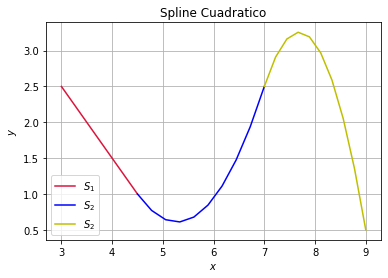

In [ ]:
# dominio de S1
x1 = np.linspace(3.,4.5,10)
# dominio de S2
x2 = np.linspace(4.5,7.,10)
# dominio de S3
x3 = np.linspace(7.,9.,10)
# definicion de las curvas
y1 = -x1 + 5.5
y2 = 0.64*x2**(2)-6.76*x2+18.46
y3 = -1.6*x3**(2)+24.6*x3-91.3
# se grafican ambas rectas
plt.plot(x1, y1, label = '$S_1$', color='crimson')
plt.plot(x2, y2, label = '$S_2$', color='b' )
plt.plot(x3, y3, label = '$S_2$', color='y' )
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Spline Cuadratico')
plt.grid()
plt.legend()
plt.show()

# Función de Activación

Diremos que una neurona se activa cuando transmite y establece una conexión con el resto de las neuronas, en otro caso la neurona permanece desactivada y por lo tanto no transmite señales al resto de las neuronas.

La función de activación es el equivalente biológico a la forma en la cuál una neurona **determina si se activa o permanece desactivada**.

### Tipos de funciones de activación

Si tomamos $S\left(x_{i}\right)=z_{i}$ para $\,0\leq i\leq n$ sobre $\left[x_{i},x_{i+1}\right]$, tenemos que $S_{i}^{''}\left(x\right)$ es una interpolación lineal y considerando que por construcción $S_{i}^{''}\left(x_{i+1}\right)=z_{i+1}$. Podemos escribir a $S_{i}^{''}$ así

$$S_{i}^{''}\left(x\right)=\frac{x-x_{i+1}}{x_{i}-x_{i+1}}z_{i}+\frac{x-x_{i}}{x_{i+1}-x_{i}}z_{i+1}$$

Si integramos $S_{i}^{''}\left(x\right)$ dos veces, obtenemos

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+cx+d \tag{5}$$

Donde $h_{i}=x_{i+1}-x_{i}$ y $c, d$ son las constantes de integración. Ahora podemos emplear las condiciones de interpolación y continuidad para obtener las siguientes ecuaciones

$$interpol.\ y \ cont.=\begin{cases}
h_{i}^{3}\frac{z_{i}}{6h_{i}}+cx_{i}+d=f\left(x_{i}\right)=y_{i} & c=\frac{y_{i+1}-y_{i}}{h_{i}}-\frac{\left(z_{i+1}-z_{i}\right)}{6}h_{i}\\
h_{i}^{3}\frac{z_{i}}{6h_{i}}+cx_{i+1}+d=f\left(x_{i+1}\right)=y_{i+1} & d=\frac{y_{i}x_{i+1}-y_{i+1}x_{i}}{h_{i}}+\frac{x_{i}z_{i+1}-x_{i+1}z_{i}}{6}h_{i}
\end{cases}$$

Remplazando en la ecuación $(5)$, tenemos 

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+\left(\frac{\left(y_{i+1}-y_{i}\right)}{hi}-\frac{\left(z_{i+1}-z_{i}\right)}{6}h_{i}\right)x\frac{y_{i}x_{i+1}-y_{i+1}x_{i}}{h_{i}}+\frac{x_{i}z_{i+1}-x_{i+1}z_{i}}{6}h_{i} \tag{6}$$

La ecuación $(6)$ también es conocida como, la **forma general del Spline Cúbico**

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+\left(\frac{y_{i}}{h_{i}}-\frac{z_{i}h_{i}}{6}\right)\left(x_{i+1}-x\right)+\left(\frac{y_{i+1}}{h_{i}}-\frac{z_{i+1}h_{i}}{6}\right)\left(x-x_{i}\right)$$

Para encontrar $z_{i}$ y $z_{i+1}$ empleamos la primer condición de suavidad, por lo que al derivar y reemplazar en $(6)$ obtenemos 

$$S_{i}^{'}\left(x_{i}\right)=-\frac{1}{3}h_{i}z_{i}-\frac{1}{6}h_{i}z_{i+1}+d_{i}$$ 
y

$$S_{i-1}^{'}\left(x_{i}\right)=\frac{1}{6}h_{i-1}z_{i-1}+\frac{1}{3}h_{i-1}z_{i}+d_{i-1}$$

con 

$$d_{i}=\frac{y_{i+1}-y_{i}}{h_{i}}\quad y\quad d_{i-1}=\frac{y_{i}-y_{i-1}}{h_{i-1}}$$

Finalmente, dado que $S_{i-1}^{'}\left(x_{i}\right)=S_{i}^{'}\left(x_{i}\right)$ tenemos la siguiente ecuación para $i=1,\ldots,n-1$

$$h_{i-1}z_{i-1}+2\left(h_{i-1}+h_{i}\right)z_{i}+h_{i}z_{i+1}=6\left(d_{i}-d_{i-1}\right) \tag{7}$$

La ecuación $(7)$ se deriva de $(6)$ y es con esta ecuación que se genera un sistema de ecuaciones mediante el cual podemos encontrar los coeficientes de los Splines.

Para el caso del Spline Cúbico natural $z_{0}=z_{n}=0$ la ecuación $(6)$ nos conduce a un sistema de ecuaciones, simétrico, tridiagonal, diagonal dominante, de la forma siguiente

$$\left(\begin{array}{cccccc}
u_{1} & h_{1} & 0 & 0 & \cdots & 0\\
h_{1} & u_{2} & h_{2} & 0 & \cdots & 0\\
0 & h_{2} & u_{3} & h_{3} & \ddots & 0\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots\\
0 & 0 & \cdots & h_{n-3} & u_{n-2} & h_{n-2}\\
0 & 0 & \cdots & 0 & h_{n-2} & u_{n-1}
\end{array}\right)\left(\begin{array}{c}
z_{1}\\
z_{2}\\
\vdots\\
z_{n-2}\\
z_{n-1}
\end{array}\right)=\left(\begin{array}{c}
v_{1}\\
v_{2}\\
\vdots\\
v_{n-2}\\
v_{n-1}
\end{array}\right) \tag{8}$$

Donde

$$\begin{cases}
h_{i} & =x_{i+1}-x_{i}\\
u_{i} & =2\left(h_{i}+h_{i-1}\right)\\
d_{i} & =\frac{y_{i+1}-y_{i}}{h_{i}},\,y_{i}=f\left(x_{i}\right)\\
v_{i} & =6\left(d_{i}-d_{i-1}\right)
\end{cases}$$

#### Ejemplo

Sea el siguiente conjunto de datos.

| X | 8 |11| 15 |18|22| 
| :-:  | :-: | :-: |  :-: | :-: | :-: | 
| Y  | 5 | 9|10|8 |7|

1. Determine el spline cúbico natural que ajusta los datos.

2. Use el spline calculado en $(1)$ para encontrar el valor interpolado en $x=12.7$.

**Solución**: 

Tenemos que $n=5$, y son 4 splines $\left(i=0,\ldots,3\right)$. La ecuación cúbica en el i-ésimo spline es 

$$S_{i}\left(x\right)=\frac{z_{i}}{6h_{i}}\left(x_{i+1}-x\right)^{3}+\frac{z_{i+1}}{6h_{i}}\left(x-x_{i}\right)^{3}+\left(\frac{y_{i}}{h_{i}}-\frac{z_{i}h_{i}}{6}\right)\left(x_{i+1}-x\right)+\left(\frac{y_{i+1}}{h_{i}}-\frac{z_{i+1}h_{i}}{6}\right)\left(x-x_{i}\right)$$

Para $x_{i}\leq x\leq x_{i+1}$, con $i=0,\ldots,n$ donde $h_{i}=x_{i+1}-x_{i}$ que es la distancia del i-ésimo intervalo. Para encontrar los coeficientes intermedios $z_{i}$ se emplea la ecuación $(7)$

$$h_{i-1}z_{i-1}+2\left(h_{i-1}+h_{i}\right)z_{i}+h_{i}z_{i+1}=6\left(d_{i}-d_{i-1}\right)$$

Como se pidió el spline cúbico natural, entonces $z_{0}=z_{4}=0$ y los valores de $h_{i}$ son

$$\begin{array}{cc}
h_{0}=x_{1}-x_{0}=11-8=3 & h_{1}=x_{2}-x_{1}=15-11=4\\
h_{2}=x_{3}-x_{2}=18-15=3 & h_{3}=x_{4}-x_{3}=22-18=4
\end{array}$$

Substituyendo estos valores en (8), para $i=1,2,3$ se obtiene el siguiente sistema de ecuaciones

$$\begin{array}{c}
14z_{1}+3z_{2}+0=-6.5\\
3z_{1}+14z_{2}+4z_{3}=-5.5\\
0+4z_{2}+14z_{3}=2.5
\end{array}$$

Resolviendo el sistema de ecuaciones con alguno de los métodos conocidos, se encuentran los coeficientes del spline 

$$z_{1}=-0.3796,\,z_{2}=-0.3947,\,z_{3}=0.2913$$

una vez encontrados dichos coeficientes, se substituyen en $S_{1}\left(x\right)$, ya que ese el intervalo que se requiere evaluar.

Finalmente para responder b) se evaluá $x=12.7$ en $S_{1}\left(x\right)$ y se obtiene $S_{1}\left(12.7\right)=10.181$

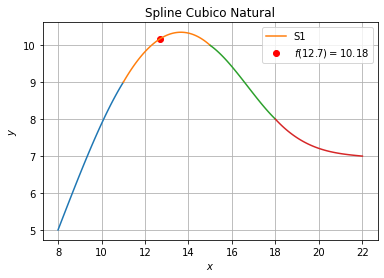

In [ ]:
# forma general del spline
def Si(zuno, zmas, xuno, xmas, yuno, ymas, x):
    spline = (((zuno/(6.0*(xmas-xuno)))*(xmas-x)**(3))+((zmas/(6.0*(xmas-xuno))*(x-xuno)**(3)))+
              (((yuno/(xmas-xuno))-(zuno*(xmas-xuno)/6.0))*(xmas-x))+
              (((ymas/(xmas-xuno))-(zmas*(xmas-xuno)/6.0))*(x-xuno)))
    return spline

# calculamos las z's
def splineCubic(x,y):
    # valores necesarios para el sistema
    h = [x[i+1]-x[i] for i in range(len(x)-1)]
    u = [(2*(h[i]+h[i-1])) for i in range(1,len(h))]
    d = [((y[i+1]-y[i])/h[i]) for i in range(len(y)-1)]
    v = [(6.)*(d[i]-d[i-1]) for i in range(1,len(d))]
    
    # se construye el sistema de ecuaciones de la ecuacion 8
    # matriz de ceros para el sistema
    mat = np.zeros((3,3))
    n = len(mat)
    
    # es necesario llenar la matriz
    # primer renglon solo tiene 2 componentes
    mat[0] = [u[0],h[0],0.]
    for i in range(1,n-1):
            mat[i] = [h[i-1], u[i], h[i]]
    # ultimo renglon solo tiene 2 componentes
    mat[n-1] = [0., h[n-2],u[n-1]]
    
    # spline cubico natural z0=zn=0
    z = np.linalg.solve(mat, v)  
    z = [0., z[0], z[1], z[2], 0.]
    
    return z

# se grafica el spline
def graficaSpline(x,y):

    # dominios de los Si's
    x0 = np.linspace(x[0], x[1], 100)
    x1 = np.linspace(x[1], x[2], 100)
    x2 = np.linspace(x[2], x[3], 100)
    x3 = np.linspace(x[3], x[4], 100)
    
    # valores de z
    z = splineCubic(x, y)
    
    #se generan los valores a garficar
    S0 = Si(z[0], z[1], x[0], x[1], y[0], y[1], x0)
    S1 = Si(z[1], z[2], x[1], x[2], y[1], y[2], x1)
    S2 = Si(z[2], z[3], x[2], x[3], y[2], y[3], x2)
    S3 = Si(z[3], z[4], x[3], x[4], y[3], y[4], x3)

    # valor de la evaluacion
    fx = Si(z[1], z[2], x[1], x[2], y[1], y[2], 12.7)
    
    # splines
    plt.plot(x0, S0)
    plt.plot(x1, S1, label='S1')
    plt.plot(x2, S2)
    plt.plot(x3, S3)
    # punto a evaluar
    plt.scatter(x=12.7, y=fx, label='$f(12.7)=10.18$', color='red')
    
    plt.grid()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title('Spline Cubico Natural')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    # datos
    x = [8.,    11.,    15.,    18.,    22.]
    y = [5., 9., 10., 8., 7.]
    
    graficaSpline(x, y)

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/pato.PNG?raw=1" width="450">

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/polinomio.PNG?raw=1" width="450">

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/cubico.PNG?raw=1" width="450">

#  Referencias

*   [Prometeo](https://github.com/jugernaut/Prometeo)
*   [Perceptron](https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3)
*   [Brilliant](https://brilliant.org/practice/intelligent-computers-menace/?chapter=introduction-to-neural-networks)
*   [Red neuronal desde cero](https://futurelab.mx/redes%20neuronales/inteligencia%20artificial/2019/06/25/intro-a-redes-neuronales-pt-1/)
*   [Libro Web](http://neuralnetworksanddeeplearning.com/index.html)
*   [Aprendizaje profundo](https://www.deeplearningbook.org/)
*   [Lista de videos](https://www.youtube.com/playlist?list=PLo8YL3HL50lUHQS80oE_ypxFi0Y3uCVal)
*   [Algebra Lineal](https://www.youtube.com/playlist?list=PLIb_io8a5NB2DddFf-PwvZDCOUNT1GZoA)
